In [3]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import plotly.express as px

from sklearn.linear_model import LinearRegression
from xgboost import XGBRegressor  
from sklearn.neighbors import KNeighborsRegressor
from sklearn.preprocessing import LabelEncoder
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_absolute_error ,mean_squared_error, median_absolute_error,confusion_matrix,accuracy_score,r2_score

In [4]:
df = pd.read_csv(r"D:\Portfolio project\Machine learning\data\insurance.csv")

In [5]:
df

,age,sex,bmi,children,smoker,region,charges
0,19,female,27.900,0,yes,southwest,16884.92400
1,18,male,33.770,1,no,southeast,1725.55230
2,28,male,33.000,3,no,southeast,4449.46200
3,33,male,22.705,0,no,northwest,21984.47061
4,32,male,28.880,0,no,northwest,3866.85520
...,...,...,...,...,...,...,...
1333,50,male,30.970,3,no,northwest,10600.54830
1334,18,female,31.920,0,no,northeast,2205.98080
1335,18,female,36.850,0,no,southeast,1629.83350
1336,21,female,25.800,0,no,southwest,2007.94500


In [6]:
df.head()

,age,sex,bmi,children,smoker,region,charges
0,19,female,27.900,0,yes,southwest,16884.92400
1,18,male,33.770,1,no,southeast,1725.55230
2,28,male,33.000,3,no,southeast,4449.46200
3,33,male,22.705,0,no,northwest,21984.47061
4,32,male,28.880,0,no,northwest,3866.85520


In [7]:
df.tail()

,age,sex,bmi,children,smoker,region,charges
1333,50,male,30.97,3,no,northwest,10600.5483
1334,18,female,31.92,0,no,northeast,2205.9808
1335,18,female,36.85,0,no,southeast,1629.8335
1336,21,female,25.80,0,no,southwest,2007.9450
1337,61,female,29.07,0,yes,northwest,29141.3603


In [8]:
df.describe().T

,count,mean,std,min,25%,50%,75%,max
age,1338.0,39.207025,14.049960,18.0000,27.00000,39.000,51.000000,64.00000
bmi,1338.0,30.663397,6.098187,15.9600,26.29625,30.400,34.693750,53.13000
children,1338.0,1.094918,1.205493,0.0000,0.00000,1.000,2.000000,5.00000
charges,1338.0,13270.422265,12110.011237,1121.8739,4740.28715,9382.033,16639.912515,63770.42801


In [9]:
df.shape

(1338, 7)

In [10]:
df.duplicated().sum()

1

In [11]:
df.drop_duplicates(inplace = True)

In [12]:
df.duplicated().sum()

0

In [13]:
df.isnull().sum()

age         0
sex         0
bmi         0
children    0
smoker      0
region      0
charges     0
dtype: int64

In [14]:
df.columns

Index(['age', 'sex', 'bmi', 'children', 'smoker', 'region', 'charges'], dtype='object')

c:\Users\rosha\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


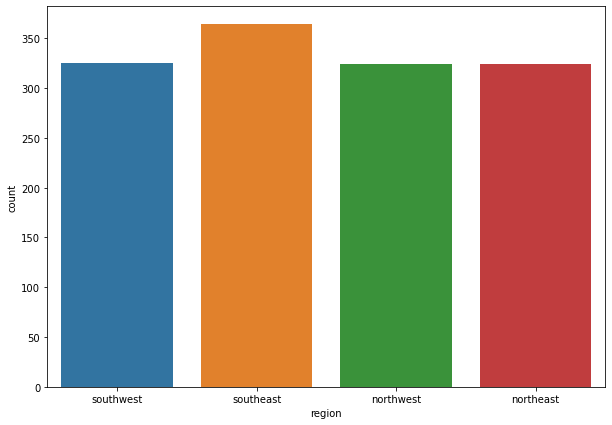

In [15]:

# how much repeat the region  in the dataset

plt.figure(figsize=(10,7))
sns.countplot(df["region"])
plt.show()

In [16]:

px.scatter(df,x="age",y="charges",color="sex",animation_frame="smoker",size="children")

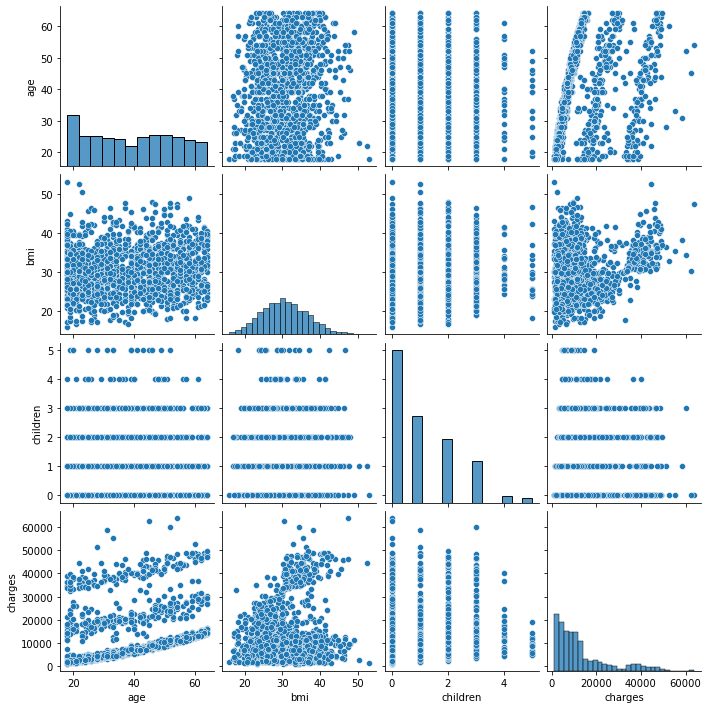

In [17]:
sns.pairplot(df)

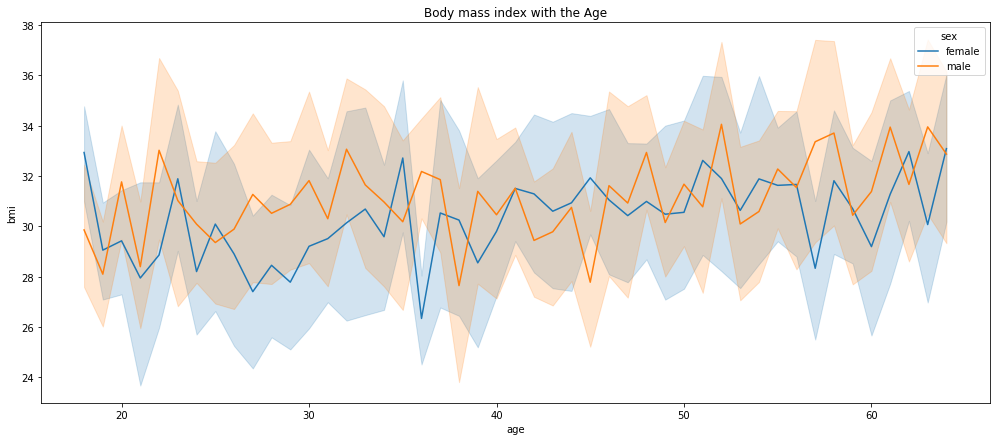

In [18]:
plt.figure(figsize=(17,7))
sns.lineplot(data=df,x="age",y="bmi",hue="sex")
plt.title("Body mass index with the Age")
plt.show()

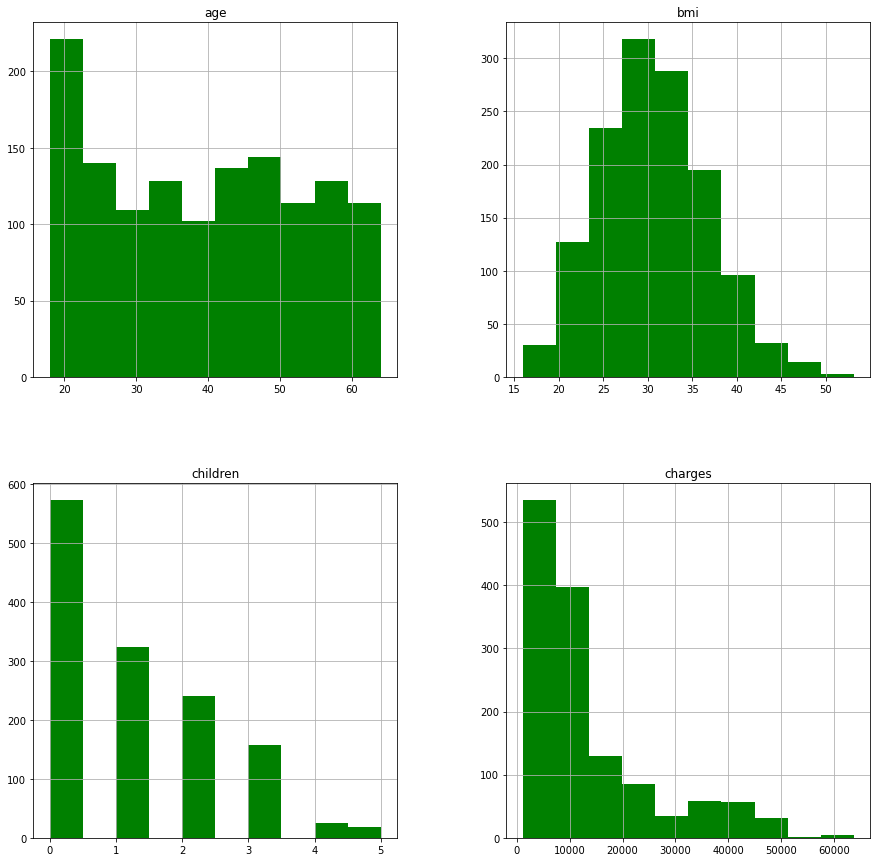

In [19]:
# Data Visualization with histogram 
df[['age',  'bmi', 'children', 'charges']].hist(bins=10, figsize=(15,15),color='green')
plt.show()

In [20]:
# group by 

reg=df.groupby("region")["charges"].mean().round(2)
reg

region
northeast    13406.38
northwest    12450.84
southeast    14735.41
southwest    12346.94
Name: charges, dtype: float64

<AxesSubplot:xlabel='region'>

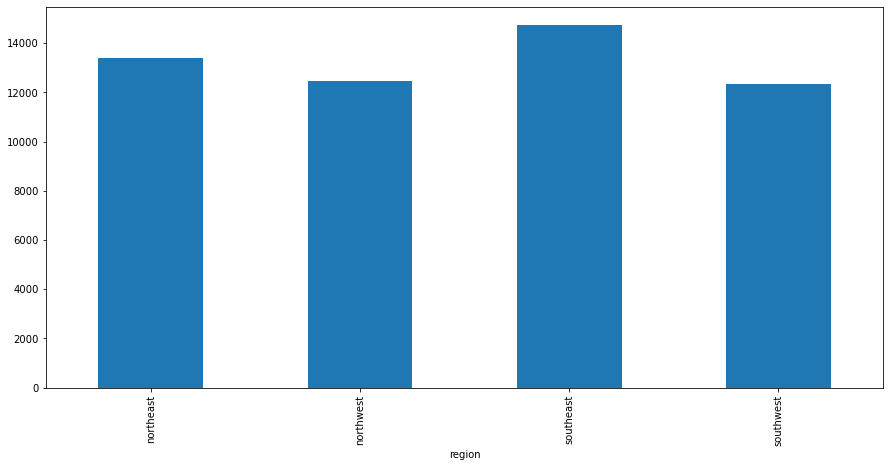

In [21]:
# Visualisation group by

reg.plot(kind="bar", figsize=(15,7))

In [22]:
a=df.groupby(["sex","smoker","region"])["charges"].mean().round(2)
a

sex     smoker  region   
female  no      northeast     9640.43
                northwest     8787.00
                southeast     8440.21
                southwest     8234.09
        yes     northeast    28032.05
                northwest    29670.82
                southeast    33034.82
                southwest    31687.99
male    no      northeast     8664.04
                northwest     8371.69
                southeast     7609.00
                southwest     7778.91
        yes     northeast    30926.25
                northwest    30713.18
                southeast    36029.84
                southwest    32598.86
Name: charges, dtype: float64

<AxesSubplot:xlabel='sex,smoker,region'>

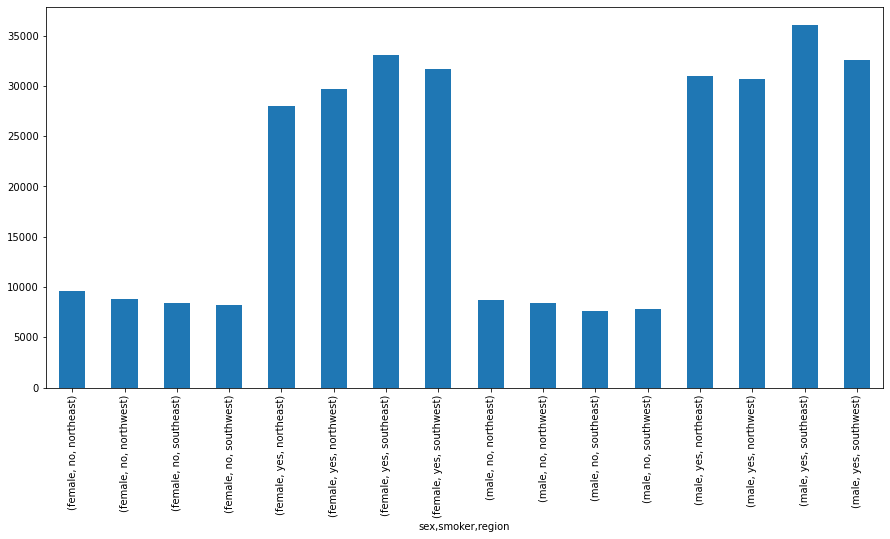

In [23]:
# Visualisation group by

a.plot(kind="bar", figsize=(15,7))

In [24]:
smo=df.groupby("smoker")["charges"].mean().round(2)
smo

smoker
no      8440.66
yes    32050.23
Name: charges, dtype: float64

In [25]:
###Analysis Result
#We have data about an Insurance and we want to know the highest Charges while analyzing this data through , We have data about an Insurance data and we want to know the highest Charges while analyzing this data through [ Children, Smoker, Region, Charges ]

#The higher the age, the higher the insurance value .

#A non-smoker has less insurance than a smoker

#The amount of insurance according to gender is similar.

#The value of the insurance according to the region is also similar .

In [26]:
# Convert categories to numbers

df["Gender"]=pd.get_dummies(df["sex"],drop_first=True)
df["Smoker"]=pd.get_dummies(df["smoker"],drop_first=True)

In [27]:
LE=LabelEncoder()
LE.fit(df["region"])
df["Region"]=LE.transform(df["region"])

In [28]:
# drop the columns that are not needed

df.drop(columns=["sex","smoker","region"],inplace=True)
df.head()

,age,bmi,children,charges,Gender,Smoker,Region
0,19,27.900,0,16884.92400,0,1,3
1,18,33.770,1,1725.55230,1,0,2
2,28,33.000,3,4449.46200,1,0,2
3,33,22.705,0,21984.47061,1,0,1
4,32,28.880,0,3866.85520,1,0,1


In [29]:
#Defined X value and y value , and split the data train

X = df.drop(columns="charges")           
y = df["charges"]    # y = quality

In [30]:
# split the data train and test
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.25, random_state=42)

In [31]:
# using the model Linear Regression

LinearRegression_model=LinearRegression()

In [32]:
# fit model

LinearRegression_model.fit(X_train,y_train)

LinearRegression()

In [33]:
# Score X and Y - test and train

print("Score the X-train with Y-train is : ", LinearRegression_model.score(X_train,y_train))
print("Score the X-test  with Y-test  is : ", LinearRegression_model.score(X_test,y_test))

Score the X-train with Y-train is :  0.7294365233101179
Score the X-test  with Y-test  is :  0.7962578620326622


In [34]:
# Expected value Y using X test
y_pred_LR=LinearRegression_model.predict(X_test)

In [35]:
# Model Evaluation
print( " Model Evaluation Linear R : mean absolute error is ", mean_absolute_error(y_test,y_pred_LR))
print(" Model Evaluation Linear R : mean squared  error is " , mean_squared_error(y_test,y_pred_LR))
print(" Model Evaluation Linear R : median absolute error is " ,median_absolute_error(y_test,y_pred_LR)) 

 Model Evaluation Linear R : mean absolute error is  4063.0773793105786
 Model Evaluation Linear R : mean squared  error is  35229015.32733742
 Model Evaluation Linear R : median absolute error is  2292.016345146212


In [36]:
print(" The Score Linear Regression " ,r2_score(y_test,y_pred_LR))

 The Score Linear Regression  0.7962578620326622


In [37]:
KNeighborsRegressor_model=KNeighborsRegressor()

In [38]:
# fit model
KNeighborsRegressor_model.fit(X_train,y_train)

KNeighborsRegressor()

In [39]:
# Score X and Y - test and train

print("Score the X-train with Y-train is : ", KNeighborsRegressor_model.score(X_train,y_train))
print("Score the X-test  with Y-test  is : ", KNeighborsRegressor_model.score(X_test,y_test))

Score the X-train with Y-train is :  0.38799590156604236
Score the X-test  with Y-test  is :  0.1337323607881269


In [40]:
# Expected value Y using X test
y_predKN=KNeighborsRegressor_model.predict(X_test)

In [41]:
print(" The Score K Neighbors Regressor Model " ,r2_score(y_test,y_predKN)) 

 The Score K Neighbors Regressor Model  0.1337323607881269


In [42]:
XGB_model=XGBRegressor(n_estimators = 25)

In [43]:
# fit model

XGB_model.fit(X_train,y_train)

XGBRegressor(base_score=None, booster=None, callbacks=None,
             colsample_bylevel=None, colsample_bynode=None,
             colsample_bytree=None, early_stopping_rounds=None,
             enable_categorical=False, eval_metric=None, feature_types=None,
             gamma=None, gpu_id=None, grow_policy=None, importance_type=None,
             interaction_constraints=None, learning_rate=None, max_bin=None,
             max_cat_threshold=None, max_cat_to_onehot=None,
             max_delta_step=None, max_depth=None, max_leaves=None,
             min_child_weight=None, missing=nan, monotone_constraints=None,
             n_estimators=25, n_jobs=None, num_parallel_tree=None,
             predictor=None, random_state=None, ...)

In [44]:
# Score X and Y - test and train

print("Score the X-train with Y-train is : ", XGB_model.score(X_train,y_train))
print("Score the X-test  with Y-test  is : ", XGB_model.score(X_test,y_test))

Score the X-train with Y-train is :  0.9512316310790851
Score the X-test  with Y-test  is :  0.8699095462447873


In [45]:
# Expected value Y using X test
y_predXGB=XGB_model.predict(X_test)

In [46]:
# Model Evaluation

print(" The Score XGB Regressor  Model " ,r2_score(y_test,y_predXGB)) 

 The Score XGB Regressor  Model  0.8699095462447873


In [47]:
###Hence the best model is XGB Regressor Model

In [48]:
import pickle
pickle.dump(XGB_model, open("model.pkl", "wb"))

In [49]:
df

,age,bmi,children,charges,Gender,Smoker,Region
0,19,27.900,0,16884.92400,0,1,3
1,18,33.770,1,1725.55230,1,0,2
2,28,33.000,3,4449.46200,1,0,2
3,33,22.705,0,21984.47061,1,0,1
4,32,28.880,0,3866.85520,1,0,1
...,...,...,...,...,...,...,...
1333,50,30.970,3,10600.54830,1,0,1
1334,18,31.920,0,2205.98080,0,0,0
1335,18,36.850,0,1629.83350,0,0,2
1336,21,25.800,0,2007.94500,0,0,3


,age,bmi,children,Gender,Smoker,Region
763,27,26.03,0,1,0,0
1079,63,33.66,3,1,0,2
178,46,28.90,2,0,0,3
287,63,26.22,0,0,0,1
1290,38,19.95,2,0,0,0
...,...,...,...,...,...,...
1096,51,34.96,2,0,1,0
1131,27,45.90,2,1,0,3
1295,20,22.00,1,1,0,3
861,38,28.00,3,0,0,3


In [53]:
XGB_model.predict(X_test)

array([10127.889  ,  4490.9795 , 14319.659  , 39755.297  ,  4145.894  ,
       10301.687  , 38211.723  ,  1997.211  ,  7892.5757 , 10921.432  ,
       14150.592  , 24624.586  , 40043.79   , 19690.16   ,  7798.2056 ,
        9343.55   , 10420.166  , 38639.49   ,  3256.4724 ,  4898.9653 ,
       10257.659  , 20566.037  ,  9149.579  , 22893.77   , 37942.875  ,
       12432.543  , 43276.973  , 45837.887  , 11890.414  , 14366.246  ,
        5508.891  ,  9917.259  ,  4139.6377 , 15087.005  , 46402.223  ,
        9071.161  ,  6328.1987 ,  5025.28   , 22996.674  , 10053.172  ,
        3027.2502 , 20461.283  , 41618.277  ,  9354.582  ,  7918.5747 ,
        4154.9165 ,  5319.0454 ,  7697.6553 ,  6726.9634 ,  9841.391  ,
        6770.682  ,  9282.024  , 22258.875  ,  5514.113  ,  7848.555  ,
        9481.303  , 10098.096  ,  7660.279  , 39100.84   ,  7845.6265 ,
       13547.107  ,  4912.707  , 12647.014  ,  1777.3018 , 12362.743  ,
       14583.238  ,  5677.916  , 27757.225  , 16356.005  , 19216